In [3]:
pip install pandas matplotlib seaborn


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
file1 = '/helpdesk_customer_multi_lang_tickets.csv'
file2 = '/helpdesk_customer_tickets.csv'

data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)



In [28]:
#Analysis of Customer tickets dataset
data2.head(10)

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,36,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,"Sehr geehrter <name>,\n\nvielen Dank für Ihr I...",Request,Customer Service,medium,de,Tech Online Store,Product Support,Sales Inquiry,Technical Guidance,General Inquiry,NaN,NaN,NaN,NaN,NaN
1,39,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,Nous allons enquêter sur le problème avec Zoom...,Incident,Product Support,high,fr,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash,Problem Resolution,Performance Tuning,NaN,NaN,NaN
2,243,Problema de sonido Dell XPS,"Problema con el sonido, manejando como devoluc...",Gracias por su correo electrónico. Procesaremo...,Problem,Returns and Exchanges,medium,es,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Refund Request,NaN,NaN,NaN,NaN,NaN
3,381,Assistance requise pour la configuration du ta...,"Cher support client,\n\nNotre client, <name>, ...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Product Support,medium,fr,Software Development Company,Technical Support,Product Support,General Inquiry,Problem Resolution,Training Request,NaN,NaN,NaN,NaN
4,663,Urgente: Assistência Imediata Necessária para ...,Caro Suporte ao Cliente da Firma de Consultori...,"Caro Cliente,\n\nRecebemos sua solicitação urg...",Incident,Human Resources,medium,pt,IT Consulting Firm,Urgent Issue,Payroll Issue,Technical Support,Service Disruption,Problem Resolution,Account Assistance,NaN,NaN,NaN
5,673,Problema com o Trackpad do Dell XPS 13 9310 qu...,"Caro Suporte ao Cliente da Tech Online Store,\...","Caro <name>,\n\nObrigado por entrar em contato...",Request,Product Support,medium,pt,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Customer Service,Performance Tuning,NaN,NaN,NaN
6,717,NaN,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for contacting Tech ...",Problem,Returns and Exchanges,low,en,Tech Online Store,Technical Support,Product Support,Returns and Exchanges,Network Issue,Hardware Failure,Problem Resolution,NaN,NaN,NaN
7,900,Frequent Disconnections and Crashes,Customer reports frequent disconnections and c...,We'll investigate the issue with Zoom 5.11.0. ...,Incident,Product Support,high,en,Software Development Company,Technical Support,Service Disruption,Network Issue,Software Bug,Problem Resolution,Urgent Issue,NaN,NaN,NaN
8,929,Não é possível processar o pagamento,Mensagem de erro da transação para o Adobe Pho...,Estamos trabalhando para resolver o problema. ...,Problem,Billing and Payments,low,pt,Tech Online Store,Payment Processing,Billing Issue,Software Bug,Urgent Issue,NaN,NaN,NaN,NaN,NaN
9,1032,Urgent: Immediate Assistance Required for Serv...,"Dear IT Services Customer Support, \n\nOur ser...","Dear <name>,\n\nThank you for contacting IT Se...",Problem,Technical Support,high,en,IT Services,Technical Support,IT Support,Urgent Issue,Service Disruption,System Crash,Problem Resolution,Incident Report,NaN,NaN


In [31]:
data2.shape

(600, 18)

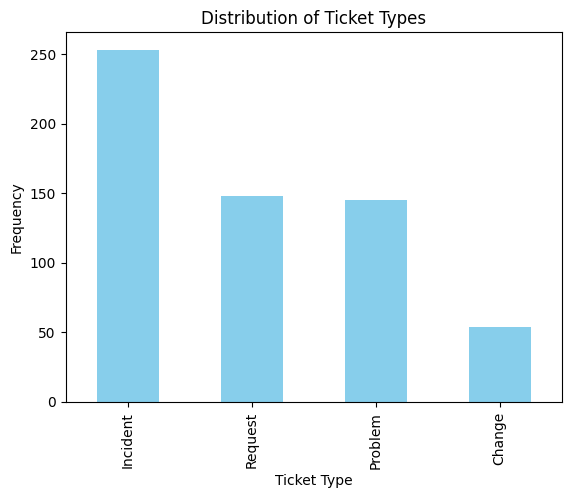

In [27]:
import matplotlib.pyplot as plt

data2['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ticket Types')
plt.xlabel('Ticket Type')
plt.ylabel('Frequency')
plt.show()

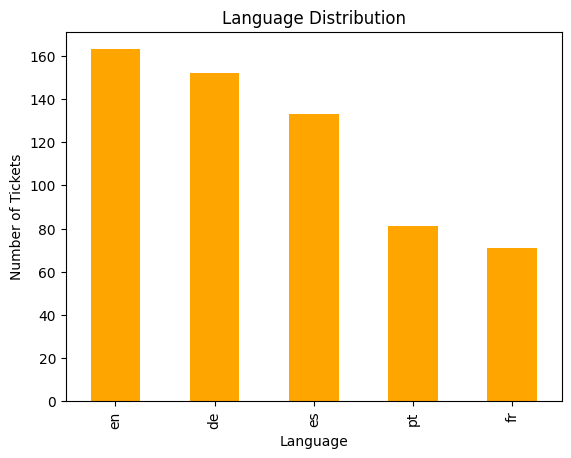

In [29]:
data2['language'].value_counts().plot(kind='bar', color='orange')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Number of Tickets')
plt.show()


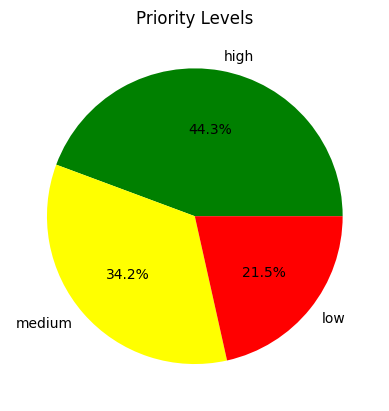

In [33]:
data2['priority'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'yellow', 'red'])
plt.title('Priority Levels')
plt.ylabel('')
plt.show()


In [34]:
missing_data = data2.isnull().sum().sort_values(ascending=False)
print(missing_data)


tag_9            600
tag_8            591
tag_7            544
tag_6            427
tag_5            168
subject            1
tag_4              0
tag_3              0
tag_2              0
id                 0
business_type      0
language           0
priority           0
queue              0
type               0
answer             0
body               0
tag_1              0
dtype: int64


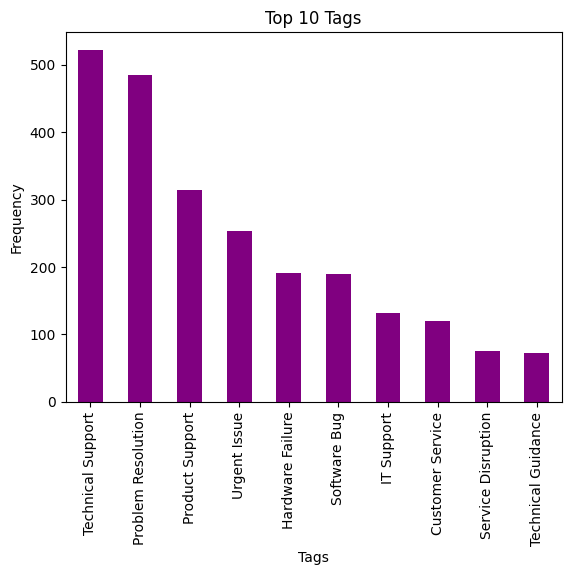

In [35]:
tag_columns = [col for col in data2.columns if col.startswith('tag')]
tags = pd.concat([data2[col] for col in tag_columns], axis=0).dropna()
top_tags = tags.value_counts().head(10)
top_tags.plot(kind='bar', color='purple')
plt.title('Top 10 Tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()


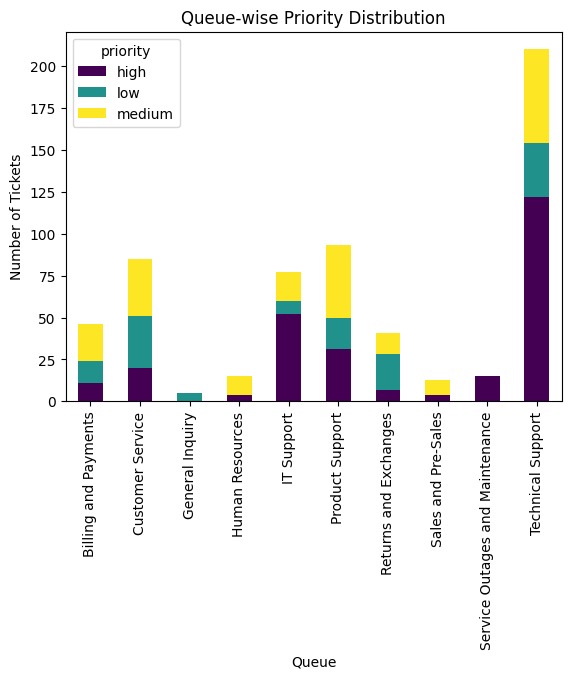

In [37]:
priority_by_queue = data2.groupby('queue')['priority'].value_counts().unstack().fillna(0)
priority_by_queue.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Queue-wise Priority Distribution')
plt.xlabel('Queue')
plt.ylabel('Number of Tickets')
plt.show()


In [39]:
data2['tag_count'] = data2[tag_columns].notnull().sum(axis=1)
avg_tags = data2['tag_count'].mean()
print(f"Average Tags per Ticket: {avg_tags}")


Average Tags per Ticket: 5.116666666666666


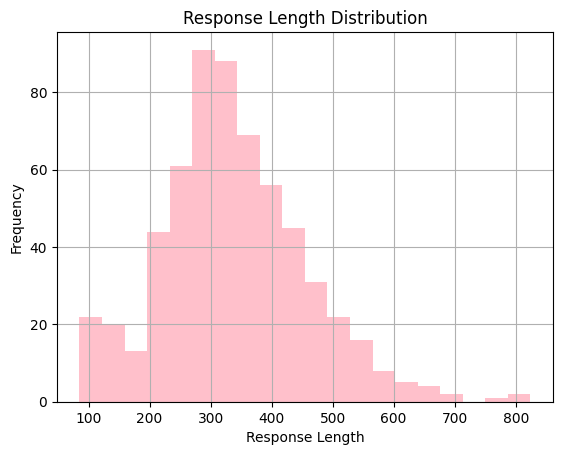

In [41]:
data2['response_length'] = data2['answer'].apply(len)
data2['response_length'].hist(bins=20, color='pink')
plt.title('Response Length Distribution')
plt.xlabel('Response Length')
plt.ylabel('Frequency')
plt.show()
